In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
from pathlib import Path

data_root_dir = Path(os.path.expanduser("~")) / "bmcs_training_data"
sample_dirs = [d for d in data_root_dir.iterdir() if d.is_dir()]

C:\Users\A_structure\bmcs_training_data\3C_1.0A


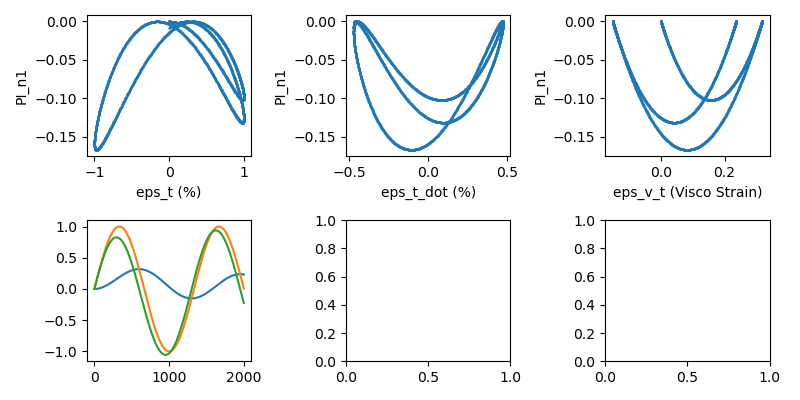

In [2]:
%matplotlib widget

selected_samples = sample_dirs[69]  # Modify for specific selection
print(selected_samples)
sample_data = np.load(list(selected_samples.glob("Pi_data_*.npy"))[0])
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
    
# Extract variables
eps_t = sample_data[:, 0]*100
delta_eps_t = sample_data[:, 1]*100 
eps_v_t = sample_data[:, 2]*100
d_t = sample_data[:, 3]  
pi_n1 = sample_data[:, 4]  

# Plot PI_n1 against each input
axes[0,0].scatter(eps_t, pi_n1, s=1, alpha=0.7)
axes[0,0].set_xlabel("eps_t (%)")
axes[0,0].set_ylabel("PI_n1")

axes[0,1].scatter(delta_eps_t/d_t, pi_n1, s=1, alpha=0.7)
axes[0,1].set_xlabel("eps_t_dot (%)")
axes[0,1].set_ylabel("PI_n1")

axes[0,2].scatter(eps_v_t, pi_n1, s=1, alpha=0.7)
axes[0,2].set_xlabel("eps_v_t (Visco Strain)")
axes[0,2].set_ylabel("PI_n1")

axes[1,0].plot(eps_v_t)
axes[1,0].plot(eps_t)
axes[1,0].plot(eps_t-eps_v_t)

plt.tight_layout()
plt.show()


In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=eps_t,
    y=delta_eps_t,
    z=eps_v_t,
    mode='lines+markers',
    line=dict(
        color=pi_n1,
        colorscale='Viridis',
        width=4
    ),
    marker=dict(
        size=2,               # Small markers
        color=pi_n1,
        colorscale='Viridis',
        colorbar=dict(title='Total Energy'),
        opacity=0.6
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Total Strain [%]',
        yaxis_title='Delta Strain',
        zaxis_title='Viscoelastic Strain [%]'
    ),
    title='Smooth 3D Line Visualization of Strain Evolution',
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()



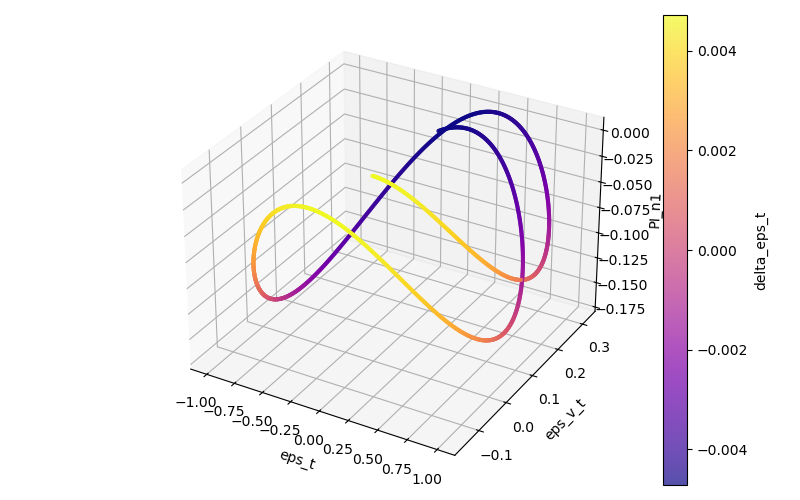

In [4]:

# Create DataFrame
df = pd.DataFrame({
    "eps_t": eps_t,
    "eps_v_t": eps_v_t,
    "PI_n1": pi_n1,
    "delta_eps_t": delta_eps_t
})

##  3D Scatter
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df["eps_t"], df["eps_v_t"], df["PI_n1"], c=df["delta_eps_t"], cmap='plasma', s=4, alpha=0.7)

ax.set_xlabel("eps_t")
ax.set_ylabel("eps_v_t")
ax.set_zlabel("PI_n1")
plt.colorbar(sc, label="delta_eps_t")
plt.tight_layout()
plt.show()




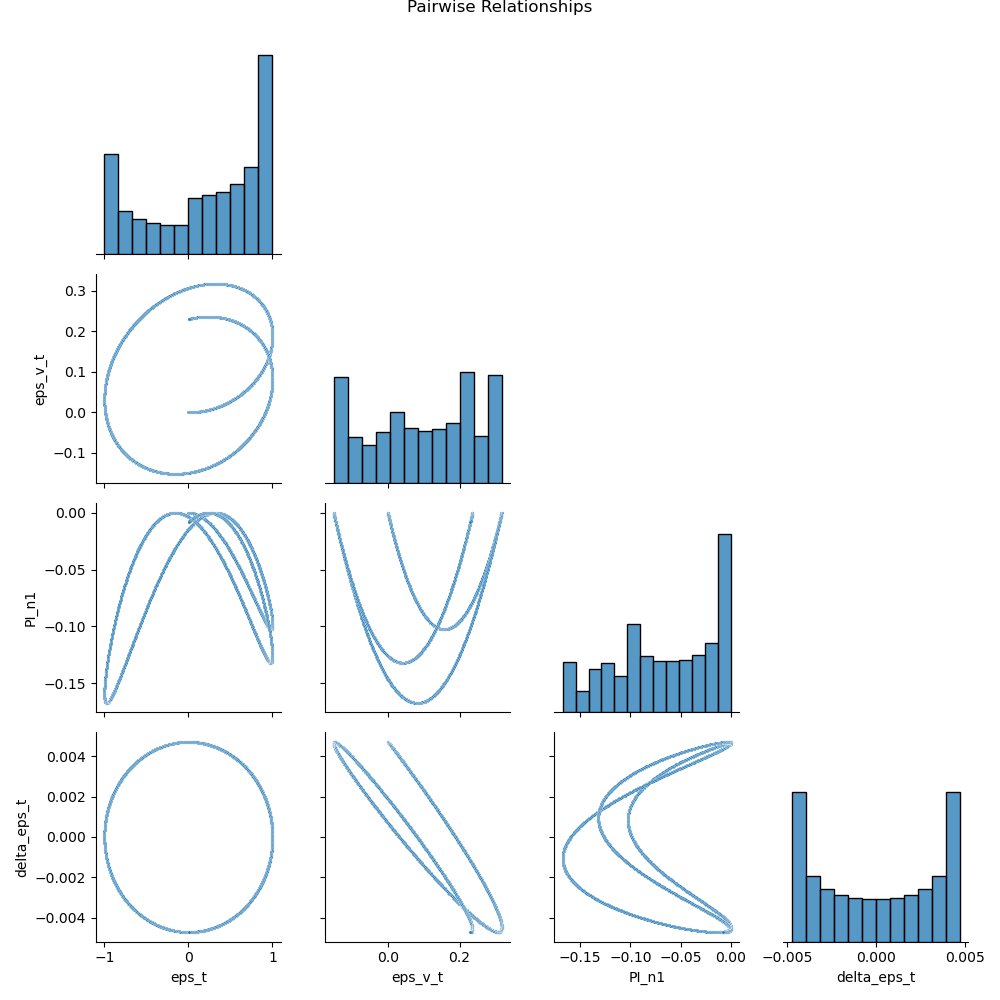

In [5]:

g= sns.pairplot(df, corner=True, plot_kws={'s': 5})  
plt.suptitle("Pairwise Relationships", y=1)
plt.tight_layout()
plt.show()

